In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
#load dataset
df = pd.read_csv("/content/Loan_Default.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (40094, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552.0,EXP,55-64,to_inst,NaN,North,direct,1.0,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.0


In [3]:
#handle missing values
# Numeric & categorical split
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

TARGET = "Status"

# Remove target from categorical
if TARGET in cat_cols:
    cat_cols.remove(TARGET)

# Fill numeric with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [4]:
#encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[TARGET] = le.fit_transform(df[TARGET])

# One-hot encode all categorical
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape after encoding:", df.shape)

Shape after encoding: (40094, 51)


In [5]:
#type cleaning
if 'age' in df.columns and df['age'].dtype == 'object':
    df['age'] = df['age'].str.extract('(\d+)').astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1942467006.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['age'] = df['age'].str.extract('(\d+)').astype(float)


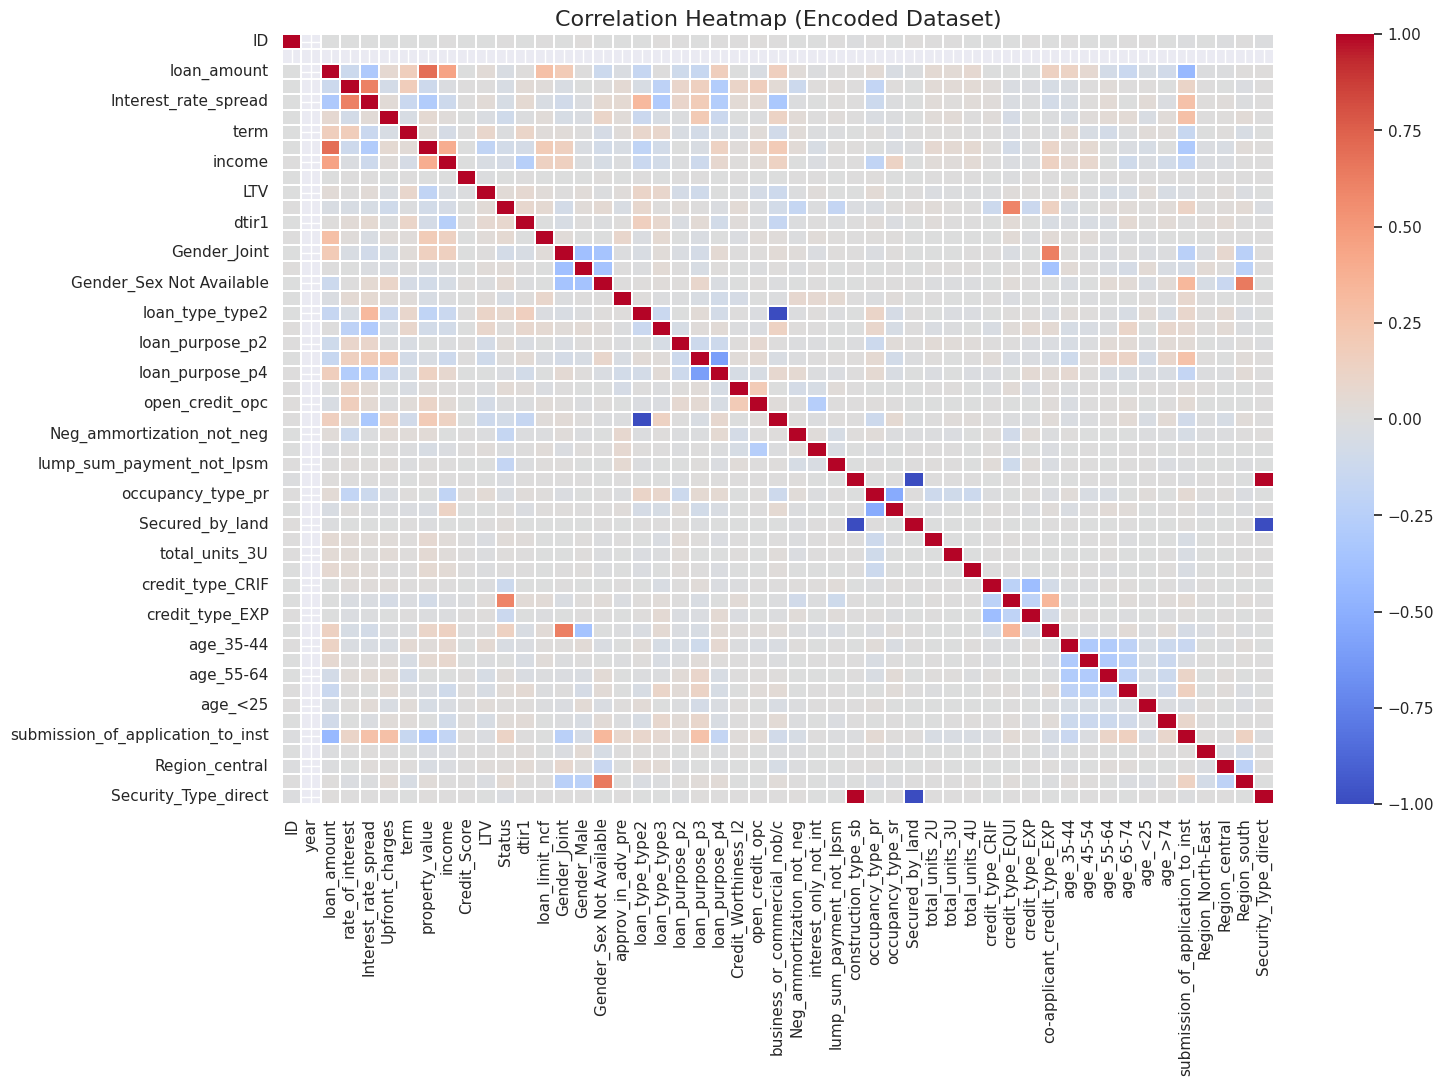

In [6]:
#correlation heatmap
plt.figure(figsize=(16, 10))

corr = df.corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.3,
    cbar=True
)

plt.title("Correlation Heatmap (Encoded Dataset)", fontsize=16)
plt.show()

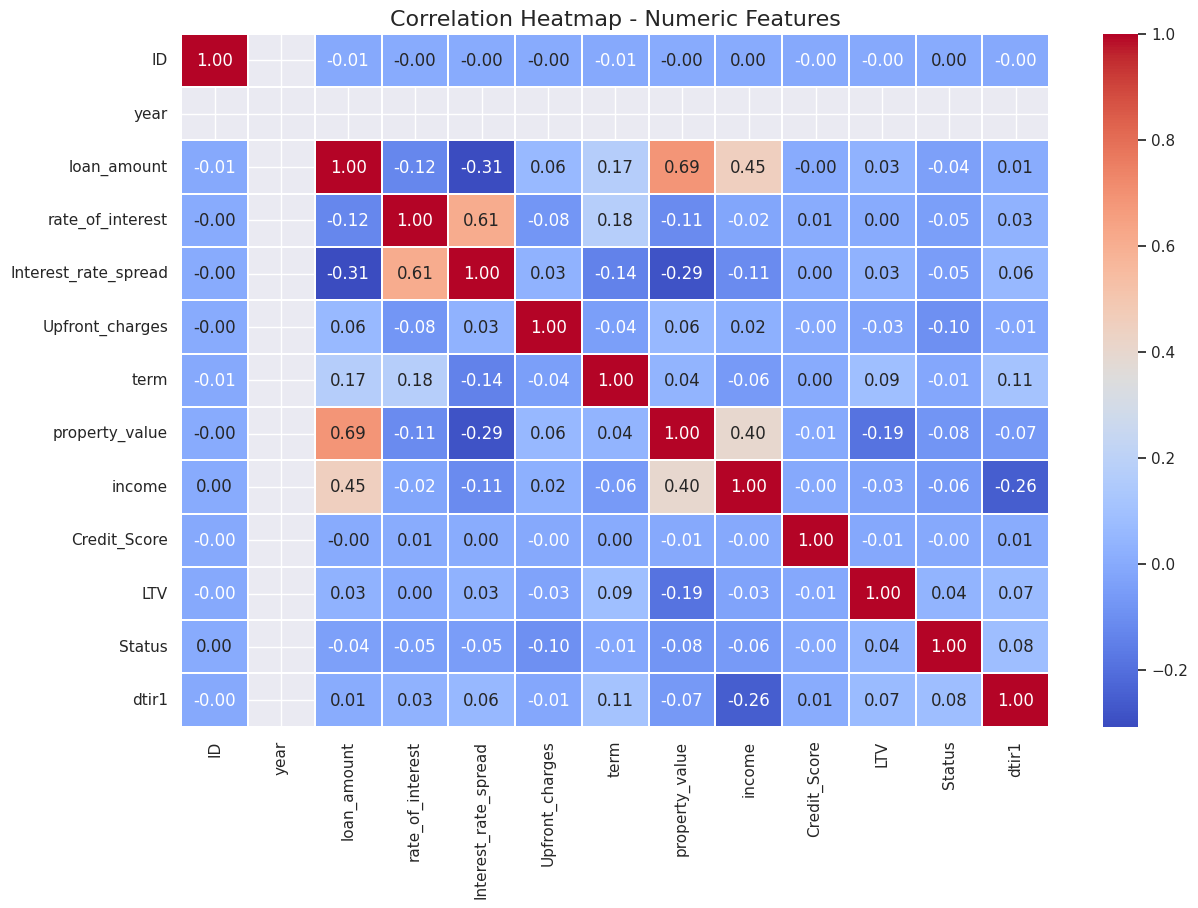

In [7]:
#only numberical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 9))
sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.3
)
plt.title("Correlation Heatmap - Numeric Features", fontsize=16)
plt.show()

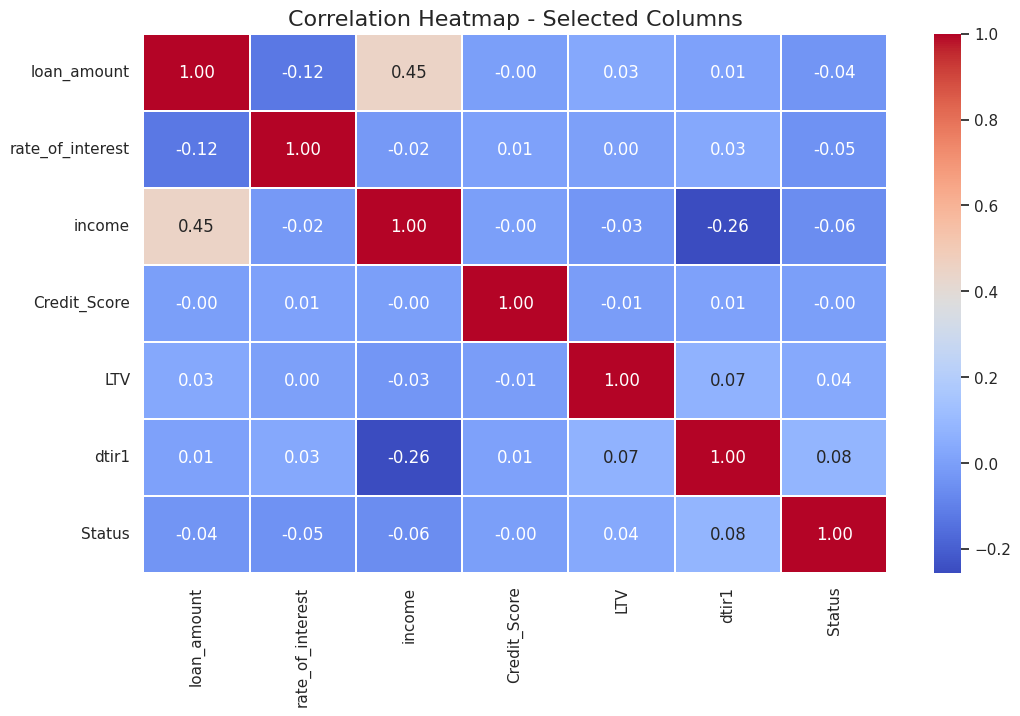

In [8]:
#only selected columns
selected_cols = [
    "loan_amount",
    "rate_of_interest",
    "income",
    "Credit_Score",
    "LTV",
    "dtir1",
    "Status"
]

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[selected_cols].corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.3
)
plt.title("Correlation Heatmap - Selected Columns", fontsize=16)
plt.show()
